# Анализ игрового рынка

**Цель исследования:**

* Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Введение

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Передо мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Проект будет иметь следующую структуру:

Шаг 1. Откроем файл с данными и изучим общую информацию
* Путь к файлу: /datasets/games.csv.
Шаг 2. Подготовим данные
* Заменим названия столбцов (приведём к нижнему регистру);
* Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
* Обработаем пропуски при необходимости:
* Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишем причины, которые могли привести к пропускам;
* Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
Шаг 3. Проведите исследовательский анализ данных
* Посмотрим, сколько игр выпускалось в разные годы. Сделаем выводы важны ли данные за все периоды?
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Сделаем выводы за какой характерный срок появляются новые и исчезают старые платформы?
* Возьмём данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не будем учитывать в работе данные за предыдущие годы.
* Сделаем выводы о том, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесём выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Сделаем выводы о том, что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Шаг 4. Составим портрет пользователя каждого региона
* Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Сделаем выводы влияет ли рейтинг ESRB на продажи в отдельном регионе?
Шаг 5. Проверим гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Зададим пороговое значение alpha.
Поясним:
* Как мы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишем общий вывод

Оформление: Задание выполнено в Jupyter Notebook.

## Изучение данных
* Путь к файлу: /datasets/games.csv

**Импорт библиотек:**

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

**Чтение файла csv и сохранение его в переменную:**

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**Вывод первых 15 строк:**

In [3]:
display(df.head(15));

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывожу на экран наименования столбцов:**

In [165]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Описание данных:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Знакомлюсь с информацией о датафрейме:**

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Строю гистограммы по каждоому из столбцов:**

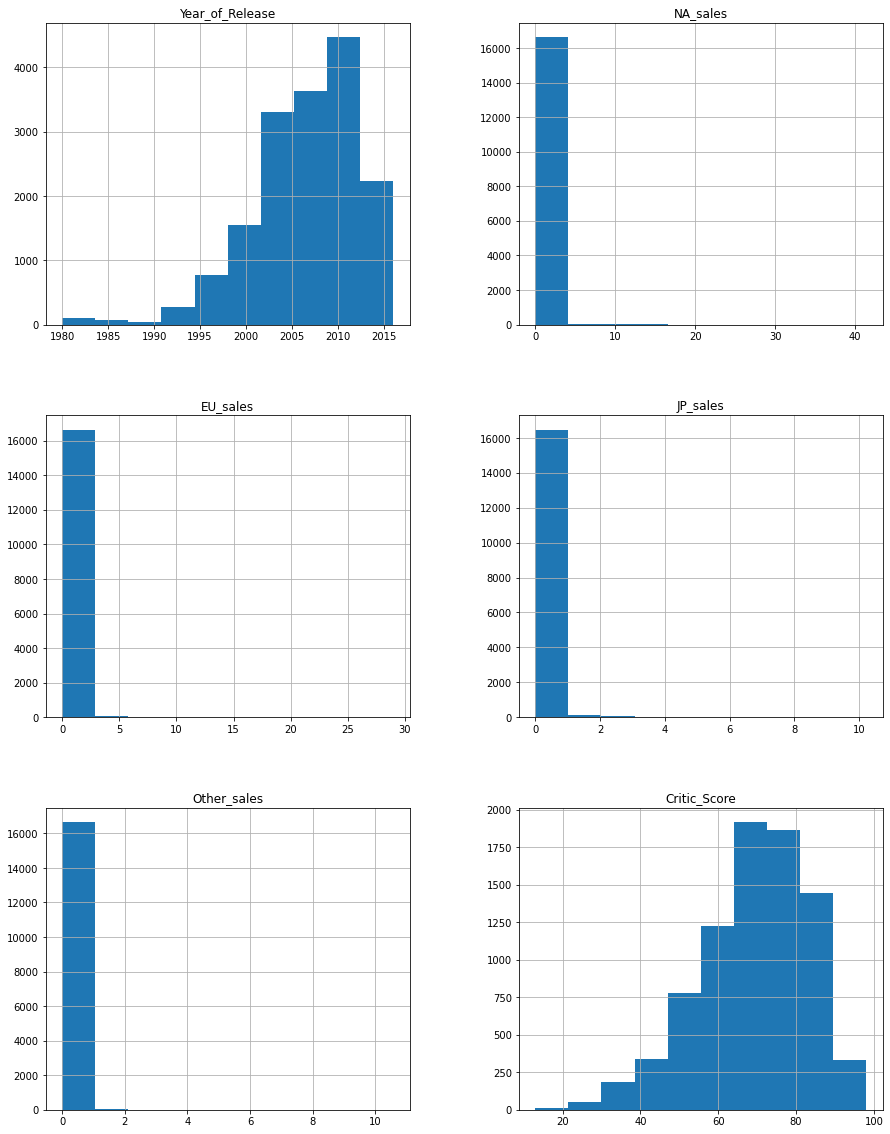

In [167]:
df.hist(figsize=(15, 20));

**Рассмотрим гистограммы столбцов датафрейма по отдельности, увеличив масштаб и количество корзин, и опишем их:**

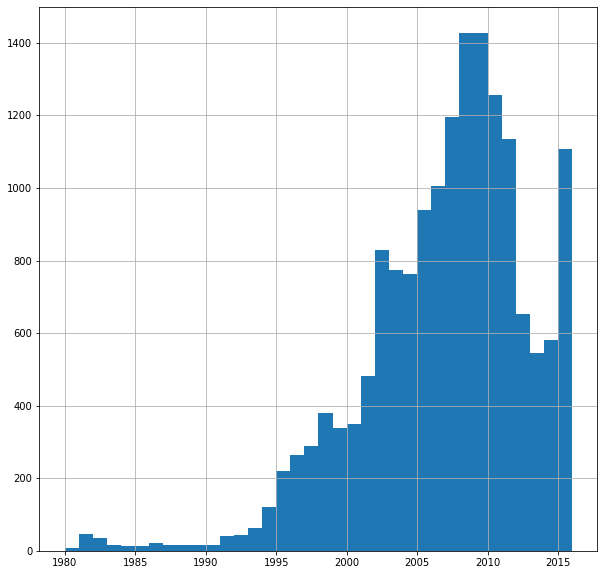

In [168]:
df['Year_of_Release'].sort_values().hist(bins=36, figsize=(10, 10));

* На графике распределения выпущенных игр по годам видно, что игры начали активно выпускаться примерно с 1993 года. Количество выпускаемых игр плавно, но стабильно росло вплоть до 2009 года, после чего видно что количество выпускаемых игр начало стабильно снижаться. Пропусков в этом столбце немного, поэтому мы просто их удалим.

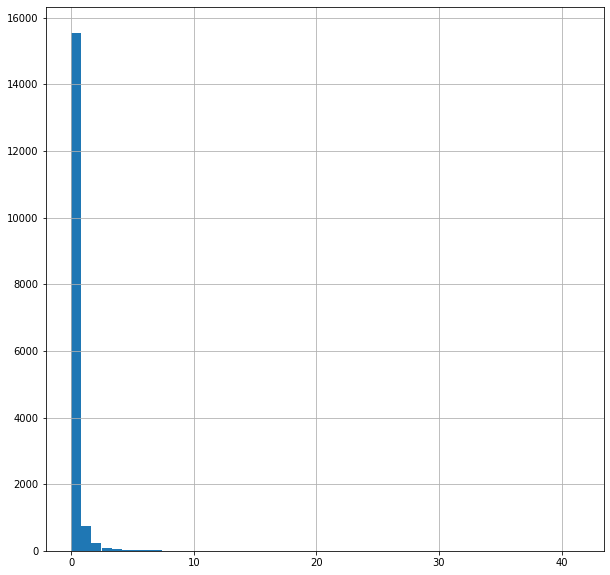

In [170]:
df['NA_sales'].hist(bins=50, figsize=(10, 10));

* В этом столбце отражены продажи в Северной Америке (миллионы проданных копий). По графику видно наличие выбрособ. Данные в этом столбце необходимо подвергнуть фильтрации. С другими столбцами датафрейма, в которых данные о продажах, ситуация аналогична.

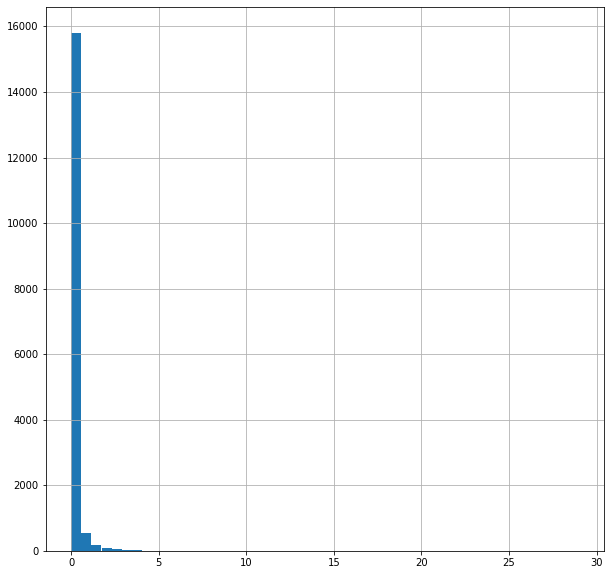

In [171]:
df['EU_sales'].hist(bins=50, figsize=(10, 10));

* Данная гистограмма отображает продажи в Европе (миллионы проданных копий).

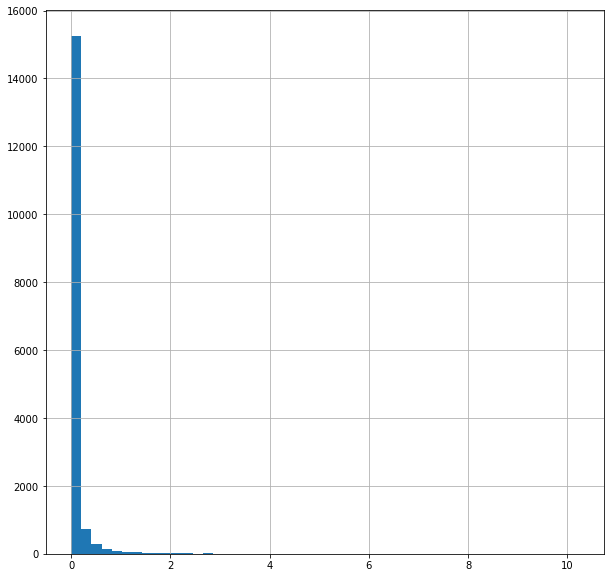

In [172]:
df['JP_sales'].hist(bins=50, figsize=(10, 10));

* Данная гистограмма отображает продажи в Японии (миллионы проданных копий).

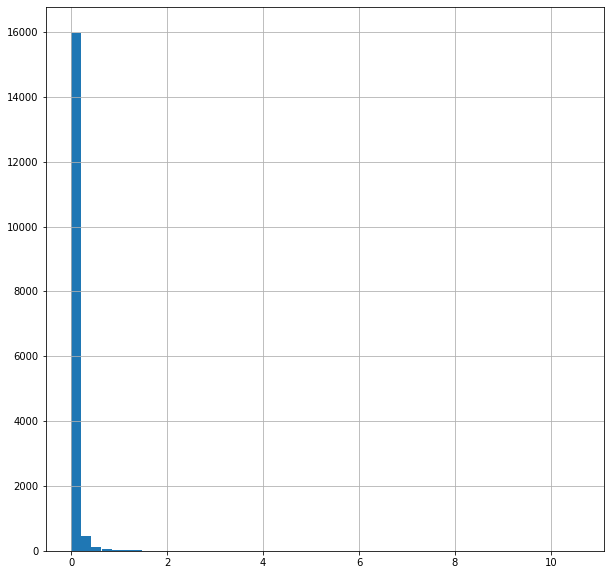

In [173]:
df['Other_sales'].hist(bins=50, figsize=(10, 10));

* Данная гистограмма отображает продажи в других странах (миллионы проданных копий).

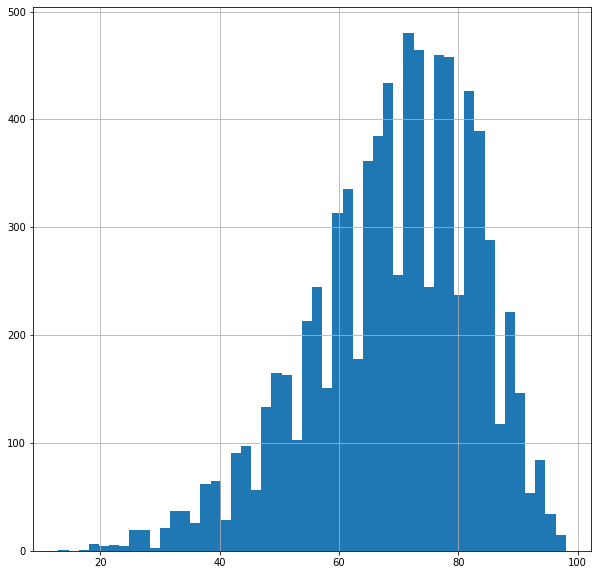

In [174]:
df['Critic_Score'].sort_values().hist(bins=50, figsize=(10, 10));

* Данная гистограмма отбражает оценку критиков (максимум 100).

In [175]:
display(df['Critic_Score'].head(15))

0    76.00
1      NaN
2    82.00
3    80.00
4      NaN
5      NaN
6    89.00
7    58.00
8    87.00
9      NaN
10     NaN
11   91.00
12     NaN
13   80.00
14   61.00
Name: Critic_Score, dtype: float64

In [176]:
df['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

* В данном столбце мы видим значения от 13-ти до 99-ти, а так же пропуски NaN. На графике мы видим распределение оценок критиков, больше всего оценок в районе 75.

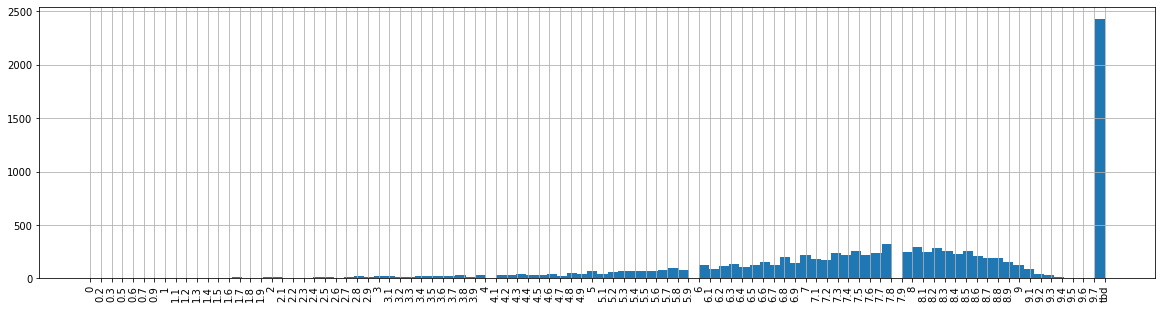

In [177]:
df['User_Score'].sort_values().hist(xrot=90, bins=100, figsize=(20, 5));

* В данном столбце мы видим значения от 0 до 9.7, а так же значение tbd. На графике мы видим оценок пользователей (максимум 10), больше всего оценок в районе 8. Видим аномалию в районе значений 9ю7 и tbd. Tbd переводится как "Не приемлемо" - при обработке заменим эти значения на Nan.

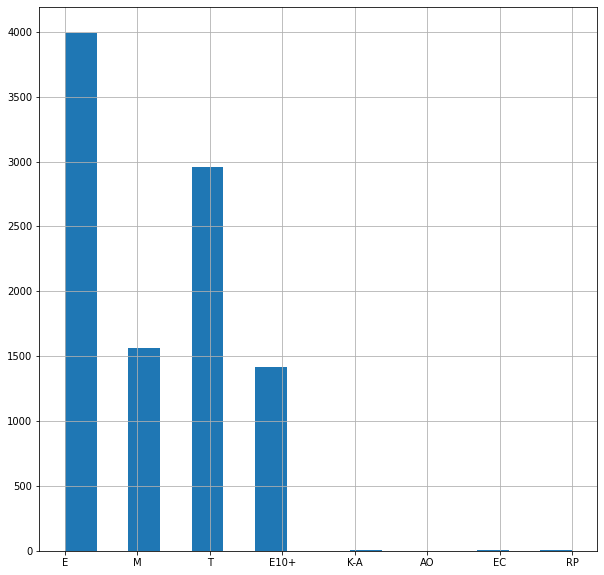

In [178]:
df['Rating'].hist(bins=16, figsize=(10, 10));

**Система ESRB - США, Мексика и Канада** 


* EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

* E	- Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.

* E10+	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

* T	- Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

* M	- Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

* AO - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

* RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

* В данном столбце мы видим  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Глядя на график можно сказать, что больше всего игр принадлежат к категории E,  подходящих для всех возрастных категорий, а после, в порядке убывания Т, М и Е10+. Описание категорий приведено выше.

**Сделаем предварительные выводы о данных, после первого знакомства с ними. Можно отметить, что:**

* В некоторых столбцах с данными имеются пропуски
* На гистограммах по отдельно взятым столбцам видно длинные "хвосты", что говорит о наличии выбросов и аномалий.
* Для дальнейшей работы с данными требуется изменить их тип на более пригодный для совершения арифметических операций.

## Подготовка данных

**Проверяю данные на наличие пропусков в каждом отдельном столбце:**

In [179]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Визуализируем информацию о пропусках:**

In [180]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Наличие пропусков в колонках' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

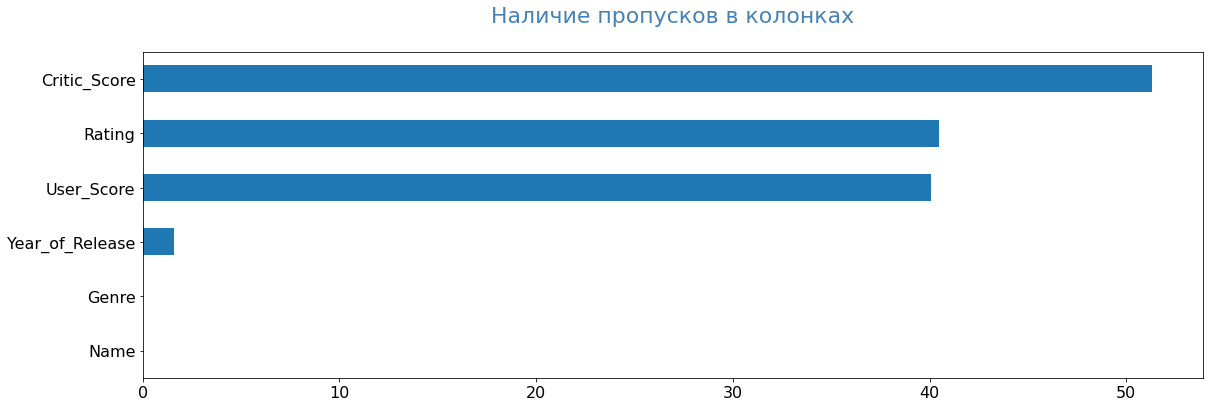

In [181]:
pass_value_barh(df)

**Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста.**

* Мы имеем пропуски в столбцах Critic_Score, Rating, User_Score и Year_of_Release.

**Заполним или удалим пропуски там, где это возможно и необходимо, при этом контролируя объём данных в датафрейме, чтобы потери при фильтрации отдельных столбцов не были больше одного процента:**

In [182]:
df.shape

(16715, 11)

In [183]:
df['Year_of_Release'].isna().sum()

269

**Посмотим на количество проданных копий в каждом регионе и на то информацию о каком проценте от количества проданных копий мы удалим при очистке от пропусков колонки "year_of_release":**

In [184]:
pd.DataFrame({'Пропуски':df.query("Year_of_Release.isna()")[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(),
              'Всего' : df[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(),
              'Процент' : df.query("Year_of_Release.isna()")[['NA_sales','EU_sales','JP_sales','Other_sales']].sum()\
              /df[['NA_sales','EU_sales','JP_sales','Other_sales']].sum()})\
.style\
.format('{:.2f}',subset=['Пропуски','Всего'])\
.format('{:.2%}',subset='Процент')

,Пропуски,Всего,Процент
NA_sales,59.15,4402.35,1.34%
EU_sales,24.46,2424.67,1.01%
JP_sales,6.70,1297.37,0.52%
Other_sales,8.61,791.32,1.09%


**Посчитаем общее количество проданных копий для всего датафрейма перед очисткой от пропусков в колонке "year_of_release"**

In [185]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


**Применим метод .describe() и отсеем строки в которых колонка "year_of_release" не имеет пропусков:**

In [186]:
df_yor_nan = df.query("Year_of_Release.isna()")

In [187]:
df_yor_nan.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,0.00,269.00,269.00,269.00,269.00,154.00
mean,NaN,0.22,0.09,0.02,0.03,67.58
std,NaN,0.42,0.21,0.09,0.08,14.83
min,NaN,0.00,0.00,0.00,0.00,22.00
25%,NaN,0.01,0.00,0.00,0.00,57.00
50%,NaN,0.09,0.02,0.00,0.01,70.00
75%,NaN,0.24,0.10,0.00,0.03,78.00
max,NaN,4.26,2.36,0.77,0.71,94.00


In [188]:
df = df.dropna(subset=['Year_of_Release']).reset_index(drop=True)

In [189]:
df['Year_of_Release'].isna().sum()

0

**Применим метод .describe() для датафрейма с колонкой "year_of_release" очищенной пропусков:**

In [190]:
df_yor_nonan = df.query("Year_of_Release")

In [191]:
df_yor_nonan.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16446.00,16446.00,16446.00,16446.00,12631.00
mean,2007.34,0.58,0.31,0.04,0.10,72.08
std,5.38,0.21,0.19,0.12,0.04,13.50
min,1985.00,0.16,0.00,0.00,0.00,48.00
25%,2007.00,0.43,0.12,0.00,0.08,61.00
50%,2008.00,0.57,0.32,0.00,0.09,71.00
75%,2011.00,0.64,0.40,0.01,0.11,84.00
max,2016.00,0.97,0.71,0.85,0.29,93.00


* К пропускам в этом столбце мог привести человеческий фактор. (Не указали год выпуска.)

In [192]:
df.shape

(16446, 11)

* Удалилось больше 1 процента данных, но в данном случае, я думаю что это допустимо.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16446 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   Other_sales      16446 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       9839 non-null   object 
 10  Rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [195]:
df['User_Score'] = df['User_Score'].replace('tbd', np.NaN)

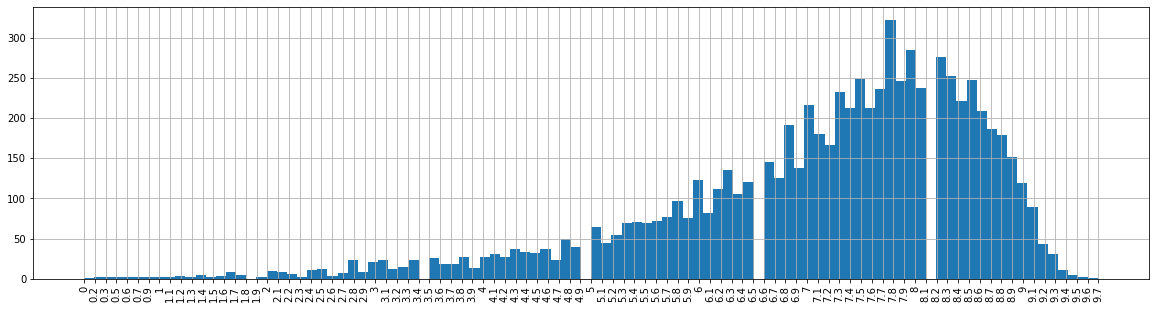

In [196]:
df['User_Score'].sort_values().hist(xrot=90, bins=100, figsize=(20, 5));

In [197]:
df['User_Score'].isna().sum()

8983

In [200]:
df['User_Score'].isna().sum()

8983

* К пропускам в этом столбце мог привести человеческий фактор. (Не все пользователи ставят оценки.)

In [201]:
df['Rating'].isna().sum()

6678

In [202]:
df['Rating'] = df['Rating'].fillna('unknown')

In [203]:
df.loc[df['Rating'] == 'RP', 'Rating'] = 'unknown'

In [204]:
df['Rating'].isna().sum()

0

In [205]:
df['Critic_Score'].isna().sum()

8463

In [207]:
df['Critic_Score'].isna().sum()

8463

* Пропуски в этом столбце могли возникнуть как по причине человеческого фактора (Критики не оценивали игру, не ввели оценку игры при формировании датафрейма).

In [208]:
df['Genre'].isna().sum()

2

**Посмотим на количество проданных копий в каждом регионе и на то информацию о каком проценте от количества проданных копий мы удалим при очистке от пропусков колонки "Genre":**

In [209]:
pd.DataFrame({'Пропуски':df.query("Genre.isna()")[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(),
              'Всего' : df[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(),
              'Процент' : df.query("Genre.isna()")[['NA_sales','EU_sales','JP_sales','Other_sales']].sum()\
              /df[['NA_sales','EU_sales','JP_sales','Other_sales']].sum()})\
.style\
.format('{:.2f}',subset=['Пропуски','Всего'])\
.format('{:.2%}',subset='Процент')

,Пропуски,Всего,Процент
NA_sales,1.78,4343.20,0.04%
EU_sales,0.53,2400.21,0.02%
JP_sales,0.03,1290.67,0.00%
Other_sales,0.08,782.71,0.01%


In [210]:
df = df.dropna(subset=['Genre']).reset_index(drop=True)

In [211]:
df['Genre'].isna().sum()

0

In [212]:
df['Name'].isna().sum()

0

In [213]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8461
User_Score         8981
Rating                0
dtype: int64

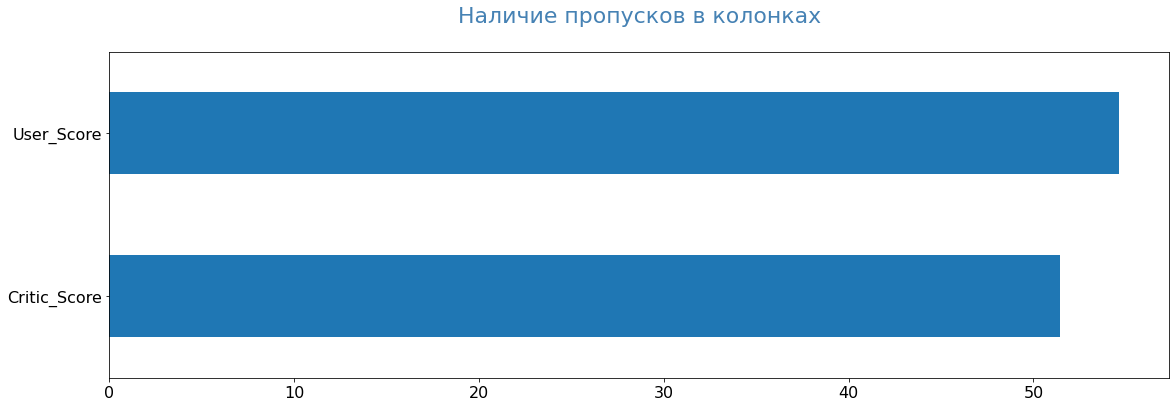

In [214]:
pass_value_barh(df)

**Приведём к нижнему регистру названия столбцов:**

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   Critic_Score     7983 non-null   float64
 9   User_Score       7463 non-null   object 
 10  Rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [216]:
df.columns = df.columns.str.lower()

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [218]:
df.shape

(16444, 11)

**Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему:**

In [219]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [220]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [221]:
df['user_score'] = df['user_score'].astype('float')

In [222]:
df.shape

(16444, 11)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [224]:
columns_to_replace = ['critic_score', 'user_score']
for i in columns_to_replace:
    if i in df[i] != 'unknown':
        i = i.astype(float)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [227]:
df.shape

(16444, 11)

In [228]:
display(df.head(10));

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


**Я изменил тип данных в столбцах:**
    
* user_score
* critic_score

Для того, чтобы со значениями в них можно было производить арифметические операции.

Значения в столбце year_of_release нельзя привести к типу int, так как среди них имеются nan.

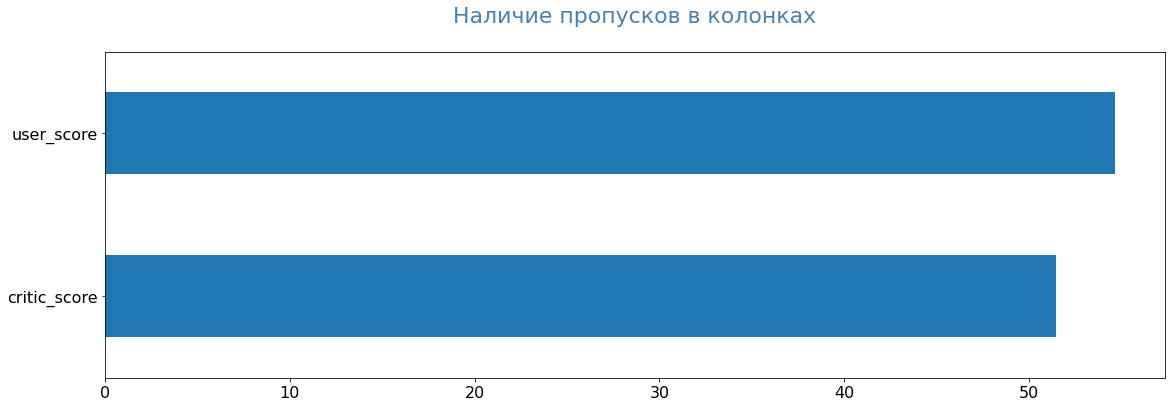

In [229]:
pass_value_barh(df)

In [230]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Посчитаем продажи во всех регионах и запишем их в отдельный столбец.**

In [231]:
display(df.head(10));

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


In [232]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [233]:
display(df.head(10));

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Приведём значения в колонках name и platform к нижнему регистру для того, чтобы найти в них дубликаты:**

In [234]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()

In [235]:
display(df.head(10));

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,super mario bros.,nes,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,wii sports resort,wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,pokemon red/pokemon blue,gb,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,tetris,gb,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,new super mario bros.,ds,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,wii play,wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,new super mario bros. wii,wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,duck hunt,nes,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Произведём поиск явных дубликатов в названиях игр:**

In [236]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

**Посмотрим на эти строки:**

In [237]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,madden nfl 13,ps3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E,2.56
15969,madden nfl 13,ps3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01


**Если производить поиск дубликатов по паре "Имя - Игровая консоль", то метод возвращает 3 явных дубликата, но у этих игр различается год выпуска. Возможно игры доработаны и перевыпущены (такое бывает), соответственно в целом они будут являться разными играми, что по-моему мнению имеет место быть. Я добавил в параметры год выпуска и нашел 1 точно явных дубликат. Думаю, что его можно удалить.**

In [238]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') 

In [239]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


**Произведём поиск неявных дубликатов в названиях платформ:**

In [240]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

**Вывод по разделу "Предобработка данных":**

В разделе "Предобработка данных" я произвёл следующие действия:

* Обработал пропуски (поставил "заглушки", удалил, оставил без изменения) там и таким образом, где и как это было необходимо.
* Изменил тип данных в столбцах, в которых это требовалось сделать, для того, чтобы со значениями в них можно было проводить арифметические операции.
* Привел к нижнему регистру названия всех столбцов и значения в столбцах name и platform. 
* Произвёл поиск явных и неявных дубликатов и принял решение по их обработке.

После обработки данных мы получили датафрейм, готовый к исследовательскому анализу, с данными по которым можно будет сделать корректные выводы.

## Проведём исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы. Сделаем выводы важны ли данные за все периоды?**

In [241]:
# Смотрим размер DataFrame
df.shape

(16443, 12)

**Поиск дубликатов (используя subset по (Годам - Названиям игр)):**

In [242]:
df.duplicated(subset=['name', 'year_of_release']).sum()

4248

In [243]:
df_name_year = df.drop_duplicates(subset=['name', 'year_of_release'], keep='first') 

In [244]:
df_name_year.shape

(12195, 12)

In [245]:
games_count_by_year = df_name_year.pivot_table(index='year_of_release', values=['total_sales'], aggfunc=['count'])

In [246]:
games_count_by_year.head(10)

,count
,total_sales
year_of_release,
1980.00,9
1981.00,46
1982.00,36
1983.00,17
1984.00,14
1985.00,14
1986.00,21
1987.00,16


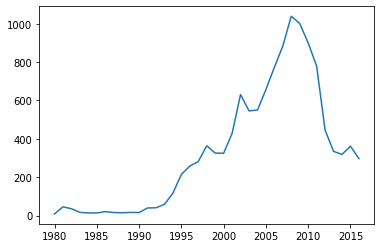

In [247]:
plt.plot(games_count_by_year);

* На графике видно количество игр, выпущенных в каждом отдельном году. Видно, что количество выпущенных за год игр начало стабильно расти в 1993-м году, с 1998 по 2002 годы видно резкое увеличение количества выпущенных игр, после небольшого спада. С 2007 по 2014 заметен резкий спад. Перед началом 2015 года, виден небольшой рост.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Сделаем вывод за какой характерный срок появляются новые и исчезают старые платформы.**

In [248]:
sales_by_plat = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending='False')

In [249]:
sales_by_plat

,total_sales
platform,
pcfx,0.03
gg,0.04
3do,0.10
tg16,0.16
ws,1.42
ng,1.44
scd,1.86
dc,15.95
gen,28.35


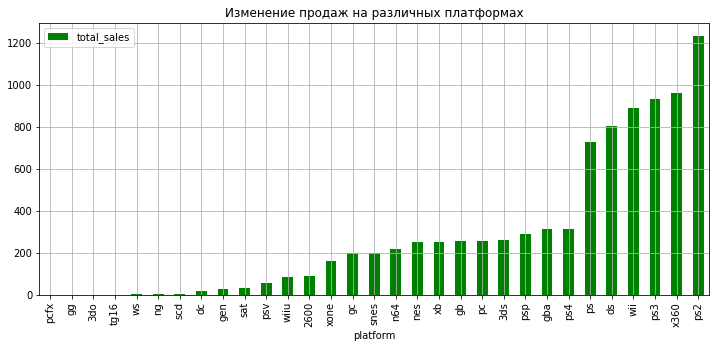

In [250]:
sales_by_plat.plot(y='total_sales', figsize=(12,5), kind='bar', rot=90, grid=True, title='Изменение продаж на различных платформах', color='green');

* На графике выделяются платформы с большим количеством продаж, такие как: DS, Wii, PS3, X360, PS2.

**Построим распределение для этих платформ по годам:**

In [251]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

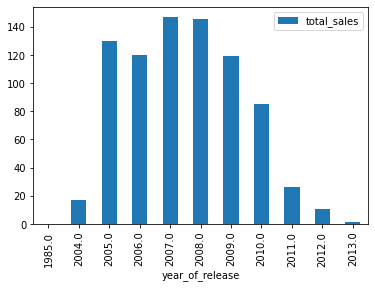

In [252]:
df_sort_by_ps2 = df.query('platform == "ds"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

* Срок жизни платформы 2012-2004=9 лет.

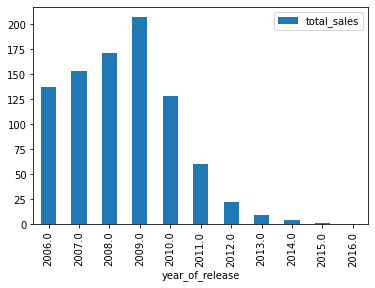

In [253]:
df_sort_by_ps2 = df.query('platform == "wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

* Срок жизни платформы 2012-2006=9 лет.

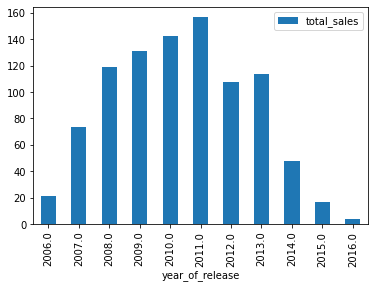

In [254]:
df_sort_by_ps2 = df.query('platform == "ps3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

* Срок жизни платформы 2015-2006=10 лет

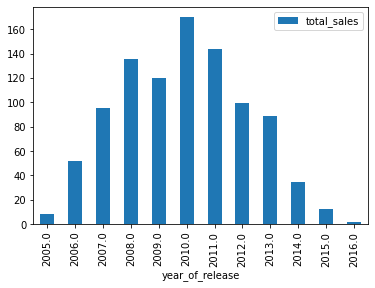

In [255]:
df_sort_by_ps2 = df.query('platform == "x360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

* Срок жизни платформы 2014-2005=11 лет.

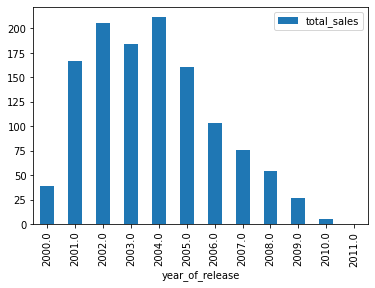

In [256]:
df_sort_by_ps2 = df.query('platform == "ps2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

* Срок жизни платформы 2010-2000=10 лет.

In [257]:
terms = (9 + 9 + 10 + 9 + 10)/5

In [258]:
print(f' Средний срок жизни платформ составляет {terms} года.')

 Средний срок жизни платформ составляет 9.4 года.


**Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

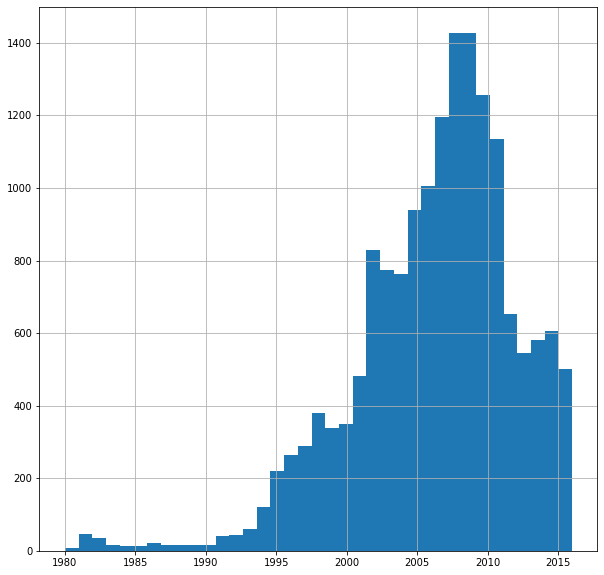

In [259]:
df['year_of_release'].sort_values().hist(bins=37, figsize=(10, 10));

**Полагаясь на графики распределения игр на популярных платформах по годам, определим актуальный период с 2014 по 2016 год:**

In [260]:
df.shape

(16443, 12)

In [261]:
data = df.query('2014 <= year_of_release <= 2016').reset_index(drop=True)

In [262]:
data.shape

(1689, 12)

In [263]:
data['year_of_release'].unique()

array([2015., 2014., 2016.])

**Выясним какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.**

In [264]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending='True')

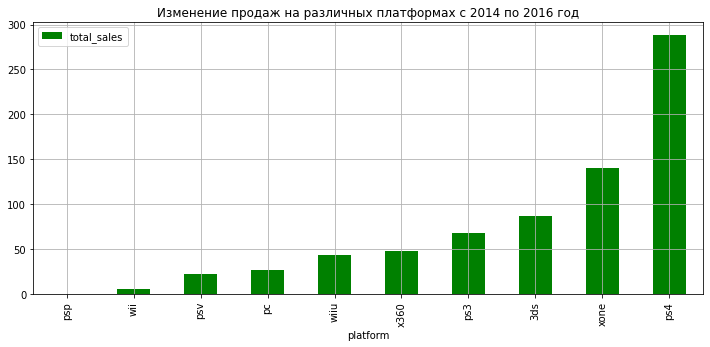

In [265]:
sales_by_platform.plot(y='total_sales', figsize=(12,5), kind='bar', rot=90, grid=True, title='Изменение продаж на различных платформах c 2014 по 2016 год', color='green');

* На графике выше видно, что больше всего игр с 2014 по 2016 годы вышло на платформах X360, PS3, 3DS, XOne, PS4.

In [266]:
pl = ['x360', 'ps3', '3ds', 'xone', 'ps4']

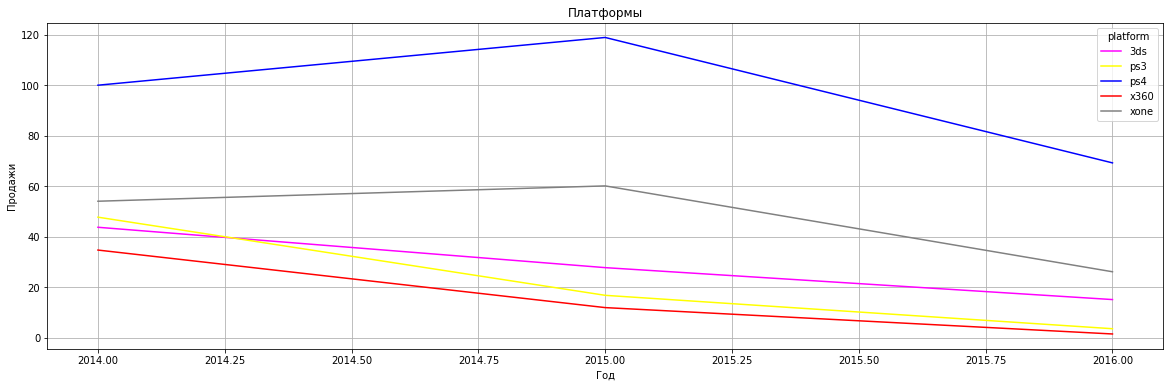

In [267]:
bar_colors=['fuchsia', 'yellow', 'blue', 'red', 'grey']

data.query('platform == @pl').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20,6),\
                                                                                                                                grid=True, color=bar_colors)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Платформы')
plt.show()

* На графике выше видно, что самые высокие продажи показывают игры на платформах PS4, XOne и 3DS.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

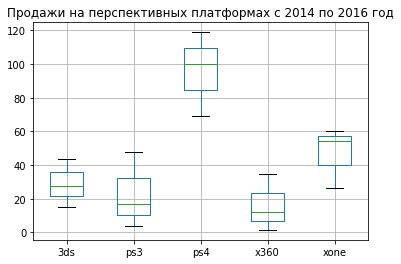

In [268]:
data.query('platform == @pl').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').boxplot();

plt.title('Продажи на перспективных платформах с 2014 по 2016 год')
plt.show();

* На графике видно, что самые высокие продажи наблюдаются у игр выпущенных на платформах PS4, XOne и 3DS.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы:**

**Возьмем для этого радания платформу PS4, так как она имеет самые высокие продажи:**

In [269]:
data[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.33
user_score     -0.01
total_sales     1.00
Name: total_sales, dtype: float64

**Выведем матрицу рассеивания для платформы PS4, отобразив отзывы пользователей:**

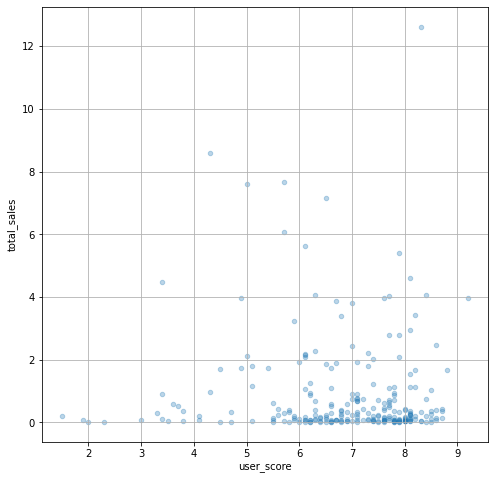

In [270]:
data[data['platform']=='ps4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

In [271]:
data_ps4 = data[data['platform']=='ps4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['total_sales'])
display('Корреляция слабо отрицательная: {}'.format(data_ps4_cor))

'Корреляция слабо отрицательная: -0.040131589472697356'

* По графику видно, что кореляции продаж с отзывами пользователей почти нет.

**Выведем матрицу рассеивания для платформы PS4, отобразив отзывы критиков:**

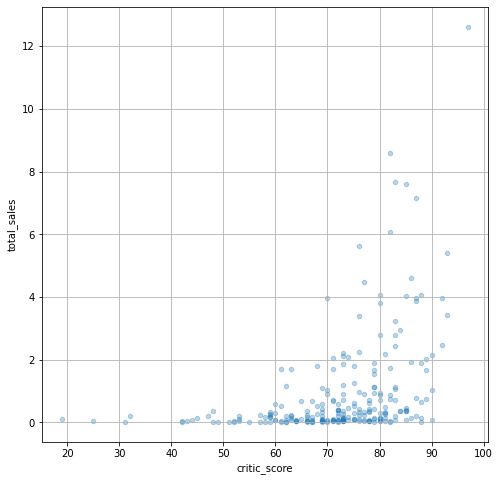

In [272]:
data[data['platform']=='ps4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

In [273]:
data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['total_sales'])
display('Корреляция слабо положительная: {}'.format(data_ps4_cor))

'Корреляция слабо положительная: 0.40266141068104083'

* На графике видно незначительную положительную кореляцию продаж с отзывами критиков.

**Соотнесём выводы с продажами игр на других платформах:**

In [274]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
pc,151.00,0.18,0.33,0.01,0.02,0.06,0.20,3.05
ps3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
ps4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
psp,13.00,0.03,0.03,0.01,0.01,0.02,0.02,0.09
psv,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96
wii,11.00,0.46,0.63,0.01,0.04,0.18,0.76,2.01
wiiu,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
x360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28


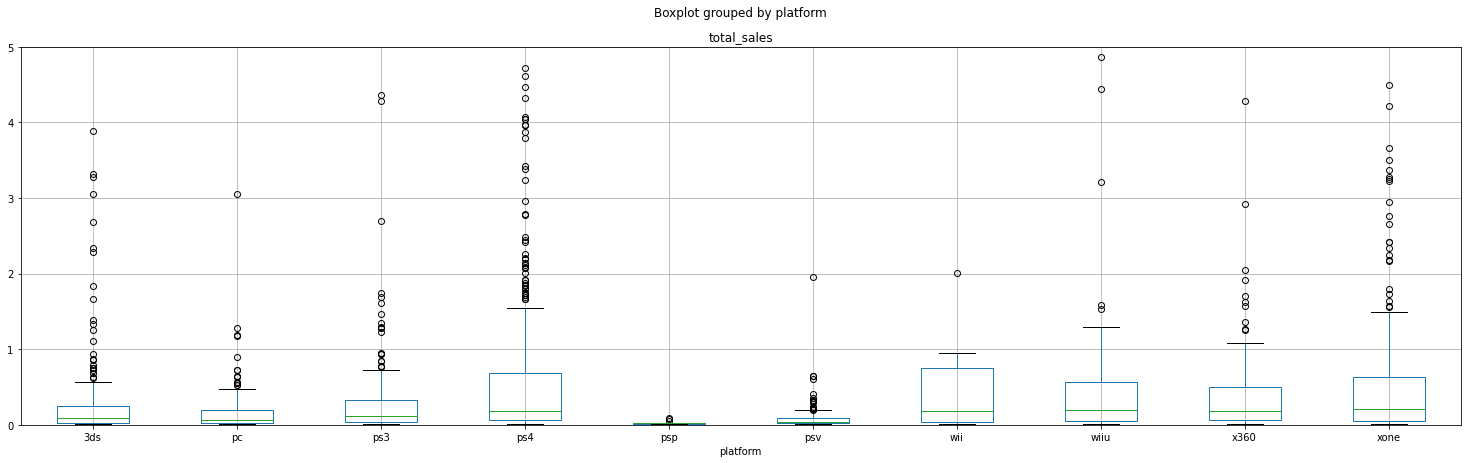

In [275]:
data.boxplot(column='total_sales', by='platform', figsize=(25,7))

plt.ylim(0, 5)
plt.show()

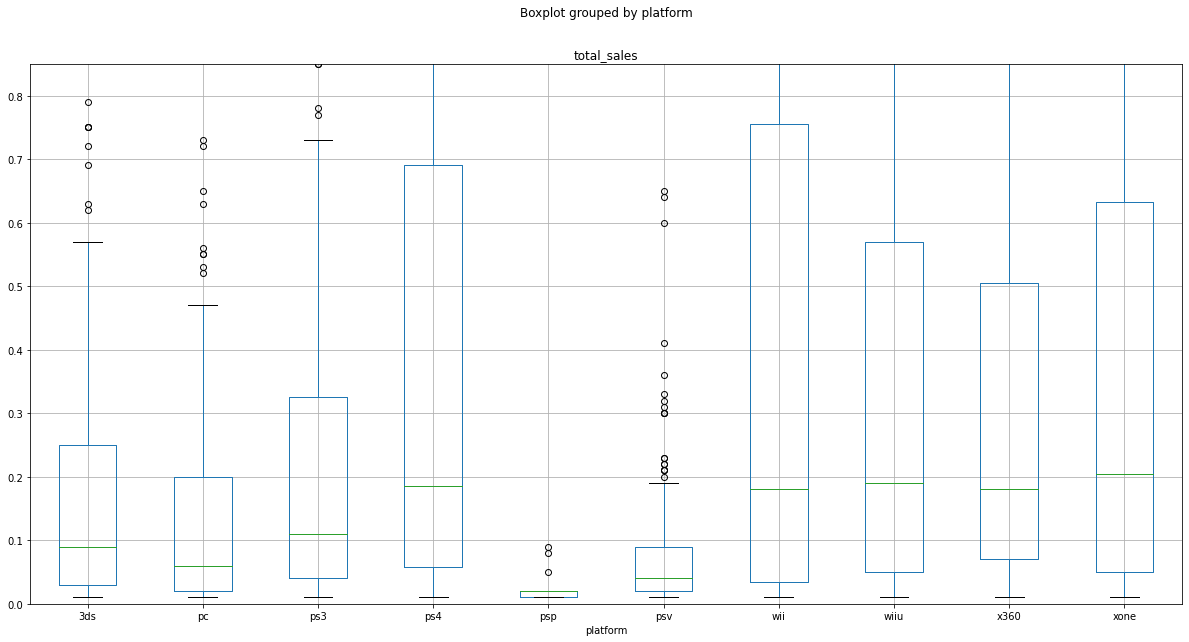

In [276]:
data.boxplot(column='total_sales', by='platform', figsize=(20,10))

plt.ylim(0, 0.85)
plt.show()

In [114]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.00,1689.00,1689.00,1689.00,1689.00,718.00,888.00,1689.00
mean,2014.95,0.17,0.16,0.06,0.05,72.31,6.62,0.43
std,0.80,0.45,0.47,0.21,0.14,12.21,1.59,1.06
min,2014.00,0.00,0.00,0.00,0.00,19.00,0.20,0.01
25%,2014.00,0.00,0.00,0.00,0.00,66.00,5.80,0.03
50%,2015.00,0.02,0.02,0.01,0.01,74.00,7.00,0.10
75%,2016.00,0.12,0.12,0.04,0.04,81.00,7.80,0.35
max,2016.00,6.03,6.31,3.18,2.38,97.00,9.30,14.63


**Из графика выше можно сказать, что по объёму продаж выделяются такие платформы как PS4, Wii, WiiU, XOne, X360. Думаю что высокие показатели связаны с тем, что на данных платформах выпускалось больше игр, чем на других и, соответственно, эти игры покупались чаще.**

* По графикам и матрице видно, что есть невысокая положительная кореляция продаж с отзывами критиков и почти нет кореляции с отзывами пользователей.

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

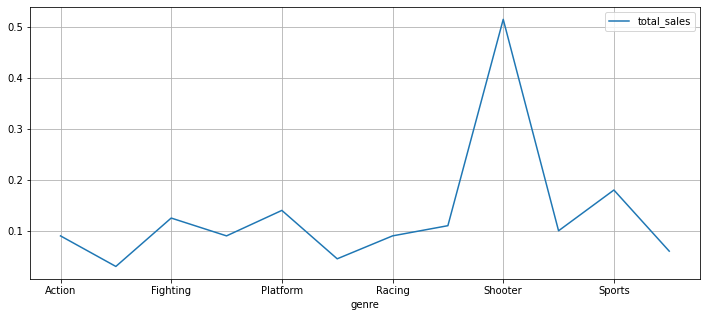

In [115]:
data.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(grid=True, figsize=(12, 5));

**На графике мы можем выделить самые популярные жанры:**

* Shooter
* Sports
* Fighting
* Racing
* Action

Жанр Shooter гораздо популярнее других жанров.

### Шаг. Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

**Самые популярные платформы (топ-5). Опишем различия в долях продаж:**

**Доля продаж для региона NA:**

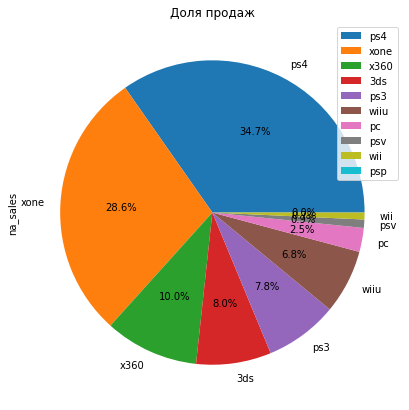

In [116]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(ascending=False, by='na_sales').plot(kind='pie', figsize=(7,7), y='na_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных платформ для Северной Америки: 
    
    PS4     34.7%
    XOne    28.6%
    X360    10%
    3DS     8%
    PS3     7.8%

**Доля продаж для региона EU:**

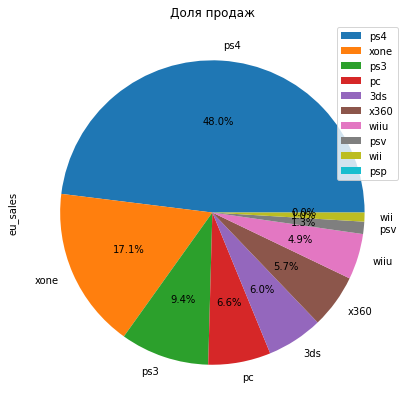

In [117]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(ascending=False, by='eu_sales').plot(kind='pie', figsize=(7,7), y='eu_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных платформ для Европы: 
    
    PS4     48%
    XOne    17.1%
    PS3     9.4%
    PC      6.6%
    3DS     6.0%

**Доля продаж для региона JP:**

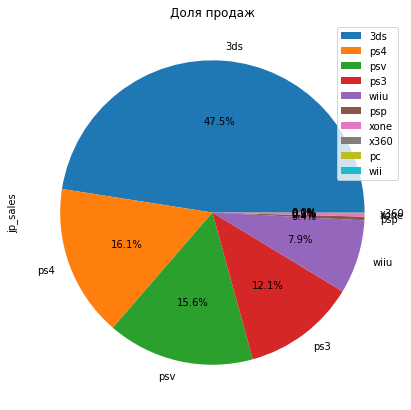

In [118]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(ascending=False, by='jp_sales').plot(kind='pie', figsize=(7,7), y='jp_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных платформ для Японии: 
    
    3DS     47.5%
    PS4     16.1%
    PSV     15.6%
    PS3     12.1%
    WiiU    7.9%

**По графикам видно, что большей попуслярностью в основном пользуются такие платформы, как PS4, XOne, PS3, PC, 3DS. Их суммарная доля для всех рынков превышает суммарную долю других платформ. Для рынков NA и EU больше продаж приходится на долю платформы PS4. Для рынка Японии больше продаж у платформы 3DS.**

**Выделим самые популярные жанры (топ-5). Поясним разницу:**

**Доля жанров для региона NA:**

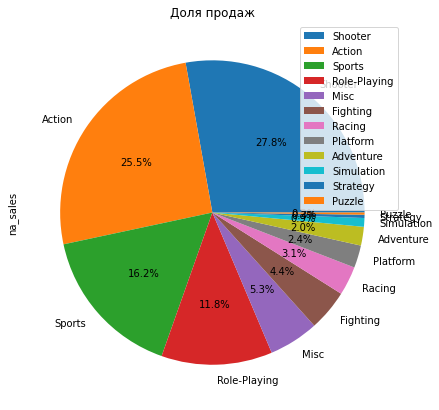

In [119]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(ascending=False, by='na_sales').plot(kind='pie', figsize=(7,7), y='na_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных жанров для Северной Америки: 
    
    Shooter          27.8%
    Action           25.5%
    Sports           16.2%
    Role-Playing     11.8%
    Misc             5.3%

**Доля жанров для региона EU:**

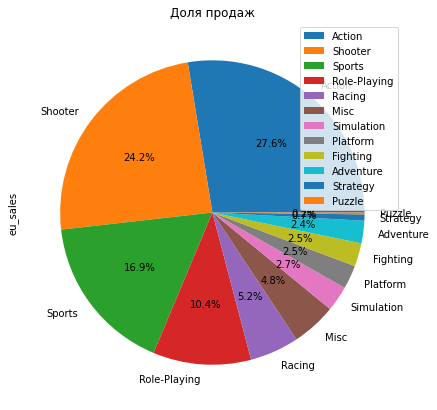

In [120]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(ascending=False, by='eu_sales').plot(kind='pie', figsize=(7,7), y='eu_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных жанров для Европы: 
    
    Action           27.6%
    Shooter          24.2%
    Sports           16.9%
    Role-Playing     10.4%
    Racing           5.2%

**Доля жанров для региона JP:**

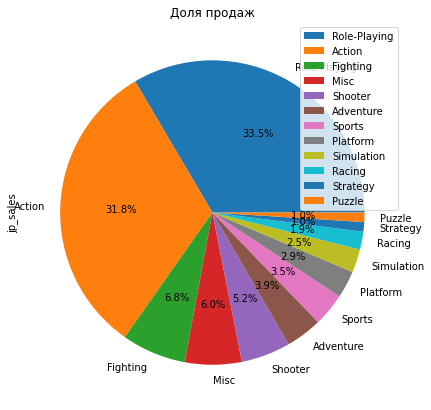

In [121]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(ascending=False, by='jp_sales').plot(kind='pie', figsize=(7,7), y='jp_sales', autopct='%1.1f%%');
plt.title('Доля продаж');

    * Топ-5 популярных жанров для Японии: 
    
    Role-Playing     33.5%
    Action           31.8%
    Fighting         6.8%
    Misc             6.0%
    Shooter          5.2%

**Из графиков видно, что популярность жанров на рынках Северной Америки, Европы и Японии различна. Если в Японии самым популярным игровым жанром является Role-Playing, то для Европы и Северной Америки это - Action и Shooter. После них для UE и NA идут спортивные игры, а для JP fighting.**

**Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [122]:
esrb_by_sales = (
data
.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'));

esrb_by_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


**Система ESRB - США, Мексика и Канада** 


* EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

* E	- Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.

* E10+	- Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

* T	- Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

* M	- Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

* AO - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

* RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

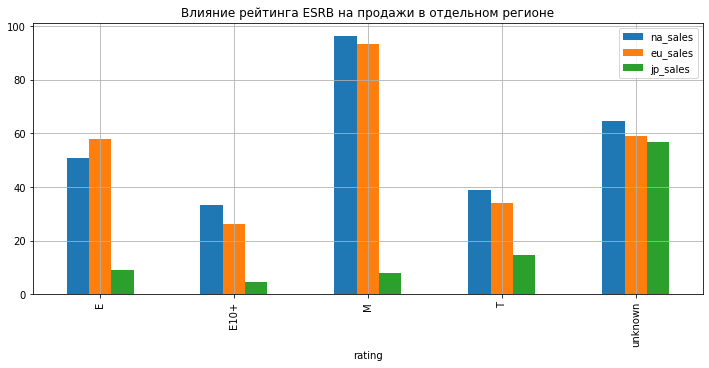

In [123]:
esrb_by_sales.plot(y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(12,5), kind='bar', rot=90, grid=True, title='Влияние рейтинга ESRB на продажи в отдельном регионе');

**Глядя на график можно сказать, что самые высокие продажи с рейтингом по ESRB:**

* М - Подходит для лиц старше 17 лет.
* Uknown - Игры с необозначенным по каким-либо причинам рейтингом.
* Е - Подходит для всех возрастных категорий.

Причём на различных рынках продажи игр с различным рейтингом отличаются.

## Проверим гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [124]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015.00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,grand theft auto v,ps4,2014.00,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,fifa 16,ps4,2015.00,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,star wars battlefront (2015),ps4,2015.00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
5,call of duty: advanced warfare,ps4,2014.00,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
6,fifa 17,ps4,2016.00,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
7,super smash bros. for wii u and 3ds,3ds,2014.00,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
8,call of duty: black ops 3,xone,2015.00,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
9,fallout 4,ps4,2015.00,Role-Playing,2.53,3.27,0.24,1.13,87.00,6.50,M,7.17


In [125]:
data['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

* H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

alpha = 0.05 Это утверждение подразумевает, что достоверность результатов теста составляет 95%.

In [126]:
data_clean = data.dropna(subset=['user_score'])
data_clean['user_score'].isna().sum()

0

In [127]:
data_clean['platform'].isna().sum()

0

In [128]:
results = st.ttest_ind(
    data_clean.query('platform == "XOne"')['user_score'],
    data_clean.query('platform == "PC"')['user_score'],
    equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**T-test показывает. что средние пользовательские рейтинги платформ Xbox One и PC равны.**

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

* H0 - Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.
* H1 - Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [129]:
data_clean['genre'].isna().sum()

0

In [130]:
results = st.ttest_ind(
    data_clean.query('genre == "Action"')['user_score'],
    data_clean.query('genre == "Sports"')['user_score'],
    equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**T-test показывает, что средние пользовательские рейтинги жанров Action и Sports не равны.**

* Нулевую гипотезу сформулировал согласно правилу равенства искомых значений. Альтернативные теории - противоположные нулевой. В какую сторону будет отклонение нам здесь не важно.

### Шаг. Общий вывод

* Исследовательский анализ был начат с описания целей и задач проекта, описания данных по которым проводился анализ, с описания структуры проекта.

* После была произведена подготовка данных к работе. Я привел наименования столбцов к "змеиному" регистру и удалил или закрыл "заглушками" пропуски в тех столбцах, где это было влозможно. Пропуски в столбцах с оценками были оставлены в первоначальном виде, так как их слишком много и замена их на какие-либо значения или удаление, могли оказать негативное влияние на дальшейший анализ. Так же был произведен поиск и обработка явных и неявных дубликатов.

* Пропуски в колонке Rating могли возникнуть из-за того, что возрастное ограничение игры не смогли определить или забыли указать его при заполнении данных об игре. Так же, поскольку рейтинги выставляет американское рейтинговое агентство, вероятность появления пропусков в этой колонке может быть связана с отсутствием популярности игры на американском рынке и недостатком внимания со стороны оценивающего агентства.

* Изучив данные я определил актуальный временной промежуток для выгрузки и работы. Промежуток с 2014 по 2016 год был взят в связи с тем, что в этот период выпускалось максимальное количество игр на различных платформах.


* Далее я посчитал общее число продаж для каждой отдельной игры во всех регионах и сформировал столбец с результатами расчёта.


* Сделаны выводы как менялись продажи по платформам. Выбраны платформы с наибольшими суммарными продажами и построено распределение по годам. Сделан вывод за какой характерный срок появляются новые и исчезают старые платформы. Средний срок жизни платформ составил 9.4 года.


* Сделаны выводы о том какие платформы лидируют по продажам, растут или падают. Выбраны несколько потенциально прибыльных платформ. Больше всего игр с 2014 по 2016 годы вышло на платформах X360, PS3, 3DS, XOne, PS4.


* Проведён анализ глобальных продаж игр в разбивке по платформам.  Сделан вывод, что самые высокие продажи наблюдались у игр выпущенных на платформах PS4, XOne и 3DS.


* Произведён анализ влияния отзывов пользователей и критиков продаж внутри платформы PS4. Расчитана корреляция между отзывами и продажами. Сделаны выводы, что кореляции продаж с отзывами пользователей почти нет и есть езначительная положительная кореляция продаж с отзывами критиков.


* Соотнесены выводы влияния отзывов пользователей и критиков на продажи внутри платформы PS4 с продажами игр на других платформах. В результате сделаны выводы, что по объёму продаж выделяются такие платформы как PS4, Wii, WiiU, XOne, X360. Вероятно высокие показатели связаны с тем, что на данных платформах выпускалось больше игр, чем на других и, соответственно, эти игры покупались чаще. По графикам и матрице видно, что есть невысокая положительная кореляция продаж с отзывами критиков и почти нет кореляции с отзывами пользователей.


**Выделены самые популярные жанры за весь период:** 

- Shooter
- Sports
- Fighting
- Racing
- Action

    Жанр Shooter гораздо популярнее других жанров.
    
    
**Составлен портрет пользователя каждого региона:**


   * Топ-5 популярных платформ для Северной Америки: 

    PS4     34.7%
    XOne    28.6%
    X360    10%
    3DS     8%
    PS3     7.8%
    

   * Топ-5 популярных платформ для Европы: 

    PS4     48%
    XOne    17.1%
    PS3     9.4%
    PC      6.6%
    3DS     6.0%
    

   * Топ-5 популярных платформ для Японии: 
    
    3DS     47.5%
    PS4     16.1%
    PSV     15.6%
    PS3     12.1%
    WiiU    7.9%


   * Топ-5 популярных жанров для Северной Америки: 

    Shooter          27.8%
    Action           25.5%
    Sports           16.2%
    Role-Playing     11.8%
    Misc             5.3%
    
    
   * Топ-5 популярных жанров для Европы: 

    Action           27.6%
    Shooter          24.2%
    Sports           16.9%
    Role-Playing     10.4%
    Racing           5.2%
    
    
   * Топ-5 популярных жанров для Японии: 

    Role-Playing     33.5%
    Action           31.8%
    Fighting         6.8%
    Misc             6.0%
    Shooter          5.2%
    
    Популярность жанров на рынках Северной Америки, Европы и Японии различна. Если в Японии самым популярным игровым жанром является Role-Playing, то для Европы и Северной Америки это - Action и Shooter. После них для UE и NA идут спортивные игры, а для JP fighting.
    
* Исследовано влияние ли рейтинга ESRB на продажи в отдельном регионе. 

Самые высокие продажи с рейтингом по ESRB:

М - Подходит для лиц старше 17 лет.
Uknown - Игры с необозначенным по каким-либо причинам рейтингом.
Е - Подходит для всех возрастных категорий.
Причём на различных рынках продажи игр с различным рейтингом отличаются.

В Японии популярны игры с неопределённым рейтингом по ESRB. Это может объясняться тем, что у двух регионов (NA и JP) разные жанровые предпочтения, а возрастной рейтинг присваивает американское агентство. Соответстенно игры, популярные в Японии в штатах не популярны и ESRB может не уделять им достаточно внимания, не ставить оценки.

* Были проверены гипотезы и расчитано, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports не равны.

**Самыми популярными платформами на рынке в мире являются - PS4, т.к. из из всех стран, только Северная Америка склоняется к XOne.**

**Жанры игр страны предпочитают разные, но большинство склоняется к жанру Shooter. Также в ТОП жанров попали такие как: Action (в Европе), Role-Playing (в Японии).**

**ТОП рейтинг от организации ESRB можно твердо считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).**

**На следующий год ставку можно делать на платформу PS4, т.к. она популярна в большинстве стран мира. В жанрах ТОП Shooter, но предлагаю не забывать про остальные два жанра, т.к. они захватываю две большие страны. Возрастная категория M пользуется большим спросом на рынке.**